## Red and White Wine Classification ##
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 <br>
https://www.kaggle.com/piyushagni5/white-wine-quality?select=winequality.names

Parameters:
 - Fixed Acidity. Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
 - Volatile Acidity. The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
 - Citric Acid. Found in small quantities, citric acid can add 'freshness' and flavor to wines.
 - Residual Sugar. The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
 - Chlorides. The amount of salt in the wine.
 - Free Sulfur Dioxide. The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
 - Total Sulfur Dioxide. Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 - Density. The density of water is close to that of water depending on the percent alcohol and sugar content.
 - pH. Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
 - Sulphates. A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
 - Alcohol. The percent alcohol content of the wine.
 - Quality. Output variable (based on sensory data, score between 0 and 10).

Importing 'pandas', 'pandas_profiling' and 'numpy' to process the dataset.

In [5]:
import pandas as pd
import pandas_profiling
import numpy as np

Importing 'matplotlib', 'scipy.stats' and 'seaborn' to visualize the data.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [7]:
red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

### Correlation ###
Let us find the overall correlation between the different parameters in order to get a better idea about the relationship of similar parameters (such as 'citric acid' and 'fixed acidity') and to confirm our suspicions.

In [8]:
def CorrelationTable(data, title):
    # Compute the correlation matrix:
    pandas_correlation = data.corr()

    # Generating a mask for the upper triangle for a cleaner table:
    mask = np.triu(np.ones_like(pandas_correlation, dtype=bool))

    # Set up the matplotlib figure:
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap:
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio:
    sns.heatmap(pandas_correlation, mask=mask, cmap=cmap, vmax=.7, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Title:
    plt.title(title)

    plt.show()

In [9]:
CorrelationTable(white_wine_data, 'White Wine Parameters Correletion')

C:\Users\Tamir\AppData\Local\Temp\ipykernel_25136\3193734460.py:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [10]:
CorrelationTable(red_wine_data, 'Red Wine Parameters Correletion')

C:\Users\Tamir\AppData\Local\Temp\ipykernel_25136\3193734460.py:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Lets use the Pandas Profile Report for a fast analyses:

In [11]:
red_profile = red_wine_data.profile_report(title="Red Wine Report")
red_profile.to_file(output_file="Red Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 37.04it/s]


In [12]:
white_profile = white_wine_data.profile_report(title="White Wine Report")
white_profile.to_file(output_file="White Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 41.67it/s]


### Lets Merge The Two ###

TODO: Use "data = data.drop(data.index[range(5)])" to make white whine's sample size similar to teh red's. (randomize it first)

In [13]:
red_wine_data['type'] = 1
white_wine_data['type'] = 0

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1055,8.2,0.64,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1,6,1
4392,6.5,0.37,0.30,2.2,0.033,39.0,107.0,0.98894,3.22,0.53,13.5,7,0
4844,7.6,0.27,0.29,2.5,0.059,37.0,115.0,0.99328,3.09,0.37,9.8,5,0
1220,10.9,0.32,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6,1
1472,7.6,0.35,0.60,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1,6,1


### Starting prediction using Logistic Regression ###
First of all, we import all the important libaries.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
#sns.pairplot(wine_data)
#sns.scatterplot(x='volatile acidity',y='alcohol', data = red_wine_data)
#print(sns.scatterplot(x='fixed acidity', y='quality', data=wine_data))


Starting by making tables with logical relations.
(Simple differences between Whie/Red wine using general knowledge and wikipedia)

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

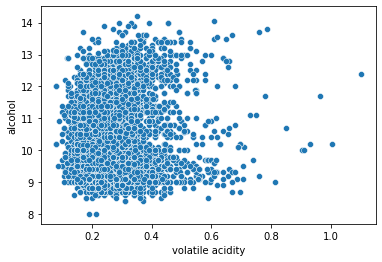

In [15]:
sns.scatterplot(x='volatile acidity',y='alcohol', data = white_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

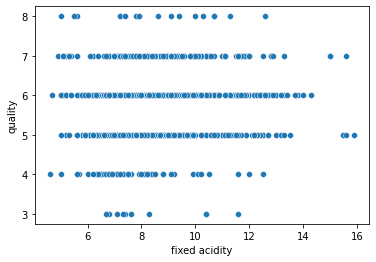

In [16]:
sns.scatterplot(x='fixed acidity', y='quality', data=red_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

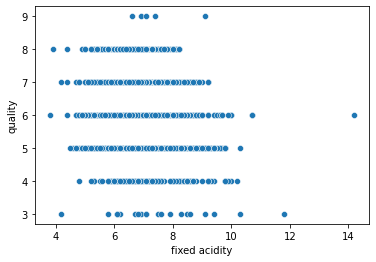

In [17]:
sns.scatterplot(x='fixed acidity', y='quality', data=white_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='type'>

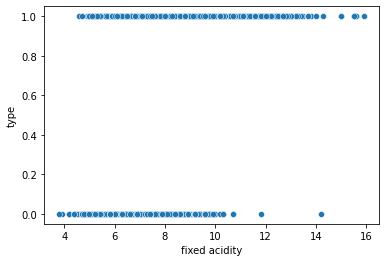

In [18]:
sns.scatterplot(x='fixed acidity', y='type', data=wine_data)

After realizing some of the connections and differences between red and white wine, we use a heatmap corrolation map in order to find exact corrolations.
(Rendering both the red wine heatmap and white wine heatmap)

<AxesSubplot:>

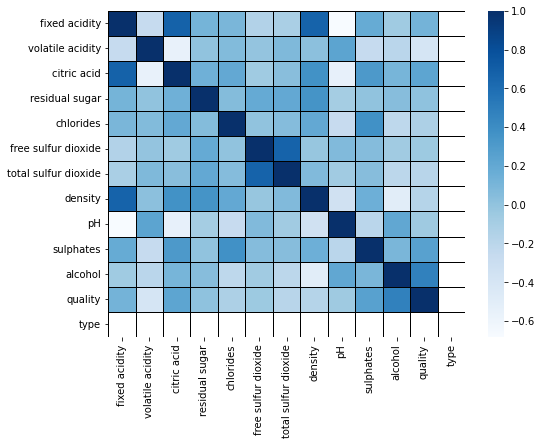

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(red_wine_data.corr(),cmap='Blues',linewidth=1,linecolor='Black')

<AxesSubplot:>

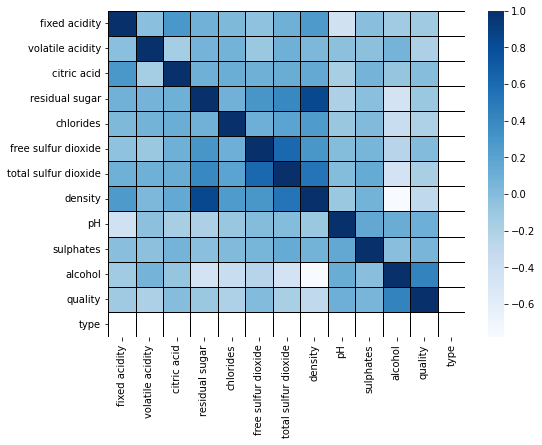

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(white_wine_data.corr(),cmap='Blues',linewidth=1,linecolor='Black')

### Building the model ###
We get rid of quality and type.<br>
<br>Quality because its subjective and doesn't connect in any way to our prediction.
<br>Type because we dont want the model to know what type of wine it is, before the prediction.
<br><br>
We will build 3 models.<br>
1 model with a non-balanced model.<br>
1 model with a balanced dataset using the class_weight function in the LogisticRegression function from sklearn.<br>
1 model with a balanced dataset using the StandardScaler function from sklearn.preprocessing function.<br>


In [21]:
x_unbalanced=wine_data.drop(['quality','type'],axis=1)
y_unbalanced=wine_data['type']

In [22]:
from sklearn.model_selection import train_test_split
x_unbalanced_train, x_unbalanced_test, y_unbalanced_train, y_unbalanced_test =train_test_split(x_unbalanced,y_unbalanced,test_size=0.20,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_unbalanced_train , y_unbalanced_train)
PredictNoBalance = model.predict(x_unbalanced_test)
score = model.score(x_unbalanced_test,y_unbalanced_test)
print(score)


0.9846153846153847


In [24]:
from sklearn.m
print(classification_report(y_unbalanced_test, PredictNoBalance))

NameError: name 'classification_report' is not defined

### End of model 1 - Unbalanced model <br>
While this model looks good, it is VERY VERY BAD AND INACCURATE.<br>
In this particular run, we actually got samples from both red and white wine.<br>
However, because it is random there might be a run where it will only get samples from white wine/red wine which will create an inaccurate prediction.<br>

In [29]:
x_reg_balance=wine_data.drop(['quality','type'],axis=1)
y_reg_balance=wine_data['type']

In [30]:
from sklearn.model_selection import train_test_split
x_reg_balance_train, x_reg_balance_test, y_reg_balance_train, y_reg_balance_test = train_test_split(x_reg_balance,y_reg_balance,test_size=0.20,random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=1000)
model.fit(x_reg_balance_train , y_reg_balance_train)
PredictRegBalance = model.predict(x_reg_balance_test)

model.score(x_reg_balance_test,y_reg_balance_test)

0.9830769230769231

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_reg_balance_test, PredictRegBalance))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.96      0.97      0.97       316

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



### End of model 2 - balanced model using the "class_weight" argument in logisticregression <br>
This model is actually really good!<br>
The data is balanced, and the predictions are quite good.<br>
However, it can be EVEN better, with a better data balancing algorithm.<br>

In [33]:
x_scaler=wine_data.drop(['quality','type'],axis=1)
y_scaler=wine_data['type']

In [34]:
from sklearn.model_selection import train_test_split
x_normal_train, x_normal_test, y_normal_train, y_normal_test =train_test_split(x_scaler,y_scaler,test_size=0.20,random_state=42)

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train_resampled,y_train_resampled = ros.fit_resample(x_normal_train,y_normal_train)


In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
fitted = model.fit(x_train_resampled,y_train_resampled)
predictBalance = model.predict(x_normal_test)
model.score(x_normal_test,y_normal_test)

C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9784615384615385

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_normal_test, predictBalance))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       984
           1       0.94      0.97      0.96       316

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.97      1300
weighted avg       0.98      0.98      0.98      1300



### End of model 3 - balanced model using the RandomOverSampler libary from imblearn<br>
By correcting our data using oversampling we can achieve a higher level of accuracy in the model.
This is the best model out of the bunch<br>
The data is balanced, and the predictions are almost perfect with a 99% score.<br>

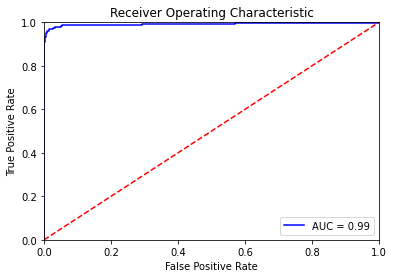

In [38]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
import matplotlib.pyplot as plt
probs = model.predict_proba(x_normal_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_normal_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_normal_train, y_normal_train)
y_predict = dummy_clf.predict_proba(x_normal_test)
dummy_score = dummy_clf.score(x_normal_test, y_normal_test)
print(dummy_score)

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_normal_train, y_normal_train)
y_predict = dummy_clf.predict_proba(x_normal_test)
dummy_score = dummy_clf.score(x_normal_test, y_normal_test)
print(dummy_score)


0.7569230769230769
0.6284615384615385
